# 數組廣播機制

In [1]:
import numpy as np

正常的加法：

In [2]:
a = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])
b = np.array([[ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2]])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

將 `b` 的值變成一維的 `[0,1,2]` 之後的加法：

In [3]:
b = np.array([0,1,2])

a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

結果一樣，雖然兩個數組的維數不一樣，但是 **Numpy** 檢測到 `b` 的維度與 `a` 的維度匹配，所以將 `b` 擴展為之前的形式，得到相同的形狀。

對於更高維度，這樣的擴展依然有效。 

如果我們再將 `a` 變成一個列向量呢？

In [4]:
a = np.array([0,10,20,30])
a.shape = 4,1
a

array([[ 0],
       [10],
       [20],
       [30]])

In [5]:
b

array([0, 1, 2])

In [6]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

可以看到，雖然兩者的維度並不相同，但是**Numpy**還是根據兩者的維度，自動將它們進行擴展然後進行計算。

對於 **Numpy** 來說，維度匹配若且唯若：

- 維度相同
- 有一個的維度是1

匹配會從最後一維開始進行，直到某一個的維度全部匹配為止，因此對於以下情況，**Numpy** 都會進行相應的匹配：

A|B|Result
---|---|---
3d array: 256 x 256 x 3 | 1d array: 3 | 3d array: 256 x 256 x 3
4d array: 8 x 1 x 6 x 1 | 3d array: 7 x 1 x 5 | 3d array: 8 x 7 x 6 x 5
3d array: 5 x 4 x 3 | 1d array: 1 | 3d array: 5 x 4 x 3
3d array: 15 x 4 x 13 | 1d array: 15 x 1 x 13 | 3d array: 15 x 4 x 13
2d array: 4 x 1 | 1d array: 3 | 2d array: 4 x 3

匹配成功後，**Numpy** 會進行運算得到相應的結果。

當然，如果相應的維度不匹配，那麼**Numpy**會報錯：

In [7]:
a = np.array([0,10,20,30])
a.shape

(4L,)

In [8]:
b.shape

(3L,)

In [9]:
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

將 `a` 轉換為列向量，還是可以計算出結果：

In [10]:
a[:, np.newaxis] + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## 例子

In [11]:
x = np.linspace(-.5,.5, 21)

In [12]:
y = x[:, np.newaxis]

In [13]:
x.shape

(21L,)

In [14]:
y.shape

(21L, 1L)

先形成一個 21 乘 21 的網格，再計算網格到原點的距離：

In [15]:
radius = np.sqrt(x ** 2 + y ** 2)

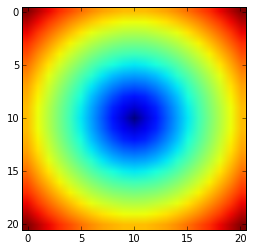

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(radius)